In [4]:
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from numpy import genfromtxt
import random
import json
from datetime import datetime , timedelta

In [9]:
hashs=['tweet_data/tweets_#gopatriots.txt','tweet_data/tweets_#gohawks.txt','tweet_data/tweets_#patriots.txt','tweet_data/tweets_#sb49.txt', 'tweet_data/tweets_#superbowl.txt', 'tweet_data/tweets_#nfl.txt']

### calculate statistics

tweet_data/tweets_#gopatriots.txt
total tweets: 26232
total time: 684.0
:Average number of tweets per hour:38.350877193
:total retweets:36727.0
:Average number of retweets per tweet:1.40008386703
:total_followers:23385331.0
:Average number of followers per user:1298.82427104
tweet_data/tweets_#gohawks.txt
total tweets: 188136
total time: 973.0
:Average number of tweets per hour:193.356628983
:total retweets:379022.0
:Average number of retweets per tweet:2.01461708551
:total_followers:119222228.0
:Average number of followers per user:1544.96978022
tweet_data/tweets_#patriots.txt
total tweets: 489713
total time: 981.0
:Average number of tweets per hour:499.19775739
:total retweets:873068.0
:Average number of retweets per tweet:1.78281564917
:total_followers:538290472.0
:Average number of followers per user:1650.32198251
tweet_data/tweets_#sb49.txt
total tweets: 826951
total time: 583.0
:Average number of tweets per hour:1418.44082333
:total retweets:2076597.0
:Average number of retweets 

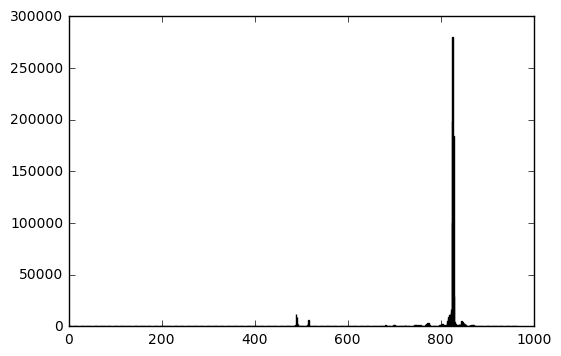

tweet_data/tweets_#superbowl.txt
total tweets: 1348767
total time: 963.0
:Average number of tweets per hour:1400.58878505
:total retweets:3221223.0
:Average number of retweets per tweet:2.3882723999
:total_followers:2477093690.0
:Average number of followers per user:3591.60447447


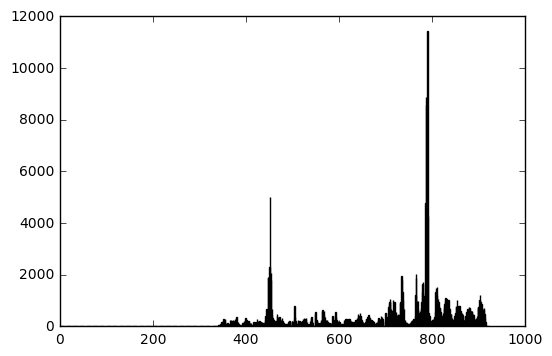

tweet_data/tweets_#nfl.txt
total tweets: 259024
total time: 927.0
:Average number of tweets per hour:279.421790723
:total retweets:398517.0
:Average number of retweets per tweet:1.5385331089
:total_followers:322447384.0
:Average number of followers per user:4289.74661753


In [12]:
for files in hashs:  
    fseconds=0
    lseconds=0
    tempi=0
    followers=0
    users=set()
    #user_arr=[]
    with open(files,'r') as ifile:
        for line in ifile.readlines():
            tweet = json.loads(line)
            if tweet['tweet']['user']['id'] not in users:
                users.add(tweet['tweet']['user']['id'])
            #user_arr.append(tweet['tweet']['user']['id'])
                followers=followers + tweet['author']['followers']
            if tempi == 0:
                fseconds=tweet['firstpost_date']
                tempi=1
            lseconds=tweet['firstpost_date']
        ifile.close()
    thours=((lseconds-fseconds)/3600)+0.00
    totalusers=len(users)
    with open(files,'r') as ifile:
        counts = [0]*(int(thours)+1)
        i=-1
        retweets=0
        
        length=0
        hcount=0
        for line in ifile.readlines():
             tweet = json.loads(line)
             i=((tweet['firstpost_date']-fseconds)/3600)
             counts[i]=counts[i]+1
             length=length+1
             retweets=retweets + tweet['metrics']['citations']['total']
             
                 
   #length = max(length,tweet['tweet']['retweet_count'])
        xaxis = [0]*(int(thours)+1)
        j=0
        k=0
        tsum=0
        while j <=int(thours):
            xaxis[j]=j
            if counts[j] >0:
                k=k+1
                tsum=tsum+counts[j]
            j=j+1
        if (files == 'tweet_data/tweets_#superbowl.txt' or files == 'tweet_data/tweets_#nfl.txt'):
            bar1 = plt.bar( xaxis,counts)
            plt.show()

        print files    
        print "total tweets: "+str(tsum)
        print "total time: "+str(thours+1)
        #print "total users: "+ str(totalusers)
        print ":Average number of tweets per hour:"+str((tsum+0.0)/(thours+1.0))
        print ":total retweets:"+str((retweets+0.0))
        print ":Average number of retweets per tweet:"+str((retweets+0.0)/(length+0.0))
        print ":total_followers:"+str(followers+0.0)
        print ":Average number of followers per user:"+str((followers+0.0)/(totalusers+0.0))
        ifile.close()

### plot

In [14]:
import urllib
import httplib
import json
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
from datetime import datetime , timedelta

import pylab as plt
from pandas import *

# -*- coding: utf-8 -*-
# getting max number of retweets



#hashs=['tweets_#superbowl.txt','tweets_#sb49.txt','tweets_#patriots.txt','tweets_#nfl.txt','tweets_#gopatriots.txt','tweets_#gohawks.txt']
hashs=['tweet_data/tweets_#superbowl.txt']

for files in hashs: 
    fseconds=0
    lseconds=0
    tempi=0
    #users=set()
    users_arr = []
    with open(files,'r') as ifile:
        for line in ifile.readlines():
            tweet = json.loads(line)
            #if tweet['tweet']['user']['id'] not in users:
                #users.add(tweet['tweet']['user']['id'])
            users_arr.append(tweet['tweet']['user']['id'])
            if tempi == 0:
                fseconds=tweet['firstpost_date']
                tempi=1
            lseconds=tweet['firstpost_date']
        ifile.close()
    thours=((lseconds-fseconds)/3600)
    totalusers=len(users_arr)
    
    with open(files,'r') as ifile:
        counts = [0]*(thours+1)
        i=-1
        retweets= [0]*(thours+1)
        followers= [0]*(thours+1)
        length=0
        tmax= [0]*(thours+1)
        #users=set()
        users_arr = []  
        for line in ifile.readlines():
             tweet = json.loads(line)
             i=((tweet['firstpost_date']-fseconds)/3600)
             counts[i]=counts[i]+1
             length=length+1
             retweets[i]=retweets[i] + tweet['metrics']['citations']['total']
             
             #if(tweet['tweet']['user']['id'] not in users):
             followers[i]=followers[i] + tweet['author']['followers']
             #users.add(tweet['tweet']['user']['id'])
             users_arr.append(tweet['tweet']['user']['id'])
             tmax[i]=max(tmax[i],tweet['author']['followers'])
             
             
       #length = max(length,tweet['tweet']['retweet_count'])
        time=[0]*(thours+1)
        results=[0]*(thours+1)
        j=0
        while j < thours:
            time[j]=j%24
            results[j]=counts[j+1]
            j=j+1
        results[thours]=counts[0]
        # print counts
        # print retweets
        # print followers
        # print tmax
        # print time
        # print results
        dataset=np.array([counts,retweets,followers,tmax,time])
        dataset=dataset.transpose()
        Y = dataset[1:,0]
        X = dataset[:-1, 0:5]
        X_res = dataset[0,0:5]
        #dta=DataFrame(dataset, columns=['counts', 'retweets','followers','tmax','time','results'])

        #formula = 'results ~ counts + retweets + tmax + time + followers'
        #res = sm.formula.ols(formula, dta).fit()
        model = sm.OLS(Y,X)
        fitting = model.fit()
        result = fitting.predict(X_res)
        print counts
        print result
        #print Y[1]
        Linear_Regression_model1 = open('Linear_Regression_model1.txt', 'a')
        predict_result = open('Linear_Regression_model2.txt', 'a')
        print >>Linear_Regression_model1, files
        print >>Linear_Regression_model1, fitting.summary()
        print >>predict_result, result
        Linear_Regression_model1.close()
        predict_result.close()

        # y=[]
        # for i in range(len(counts)):
        #     y.append(counts[i])
        # Y = np.array(y)
        # Y.rotate(-1)
        # X = np.array([counts,retweets,followers,tmax,time])
        # model = sm.OLS(Y,X)
        # results = model.fit()
        # Linear_Regression_model2 = open('Linear_Regression_model.txt2', 'a')
        # print >>Linear_Regression_model2, files
        # print >>Linear_Regression_model2, results.summary()
        # Linear_Regression_model2.close()


        ifile.close()

[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [15]:
bar1 = plt.bar( xaxis,counts)
plt.show()

ValueError: incompatible sizes: argument 'height' must be length 927 or scalar